**How to Create a Chatbot with Gradio**

**Introduction**
Chatbots are a popular application of large language models. Using gradio, you can easily build a demo of your chatbot model and share that with your users, or try it yourself using an intuitive chatbot UI.

This tutorial uses gr.ChatInterface(), which is a high-level abstraction that allows you to create your chatbot UI fast, often with a single line of code. The chatbot interface that we create will look something like this:
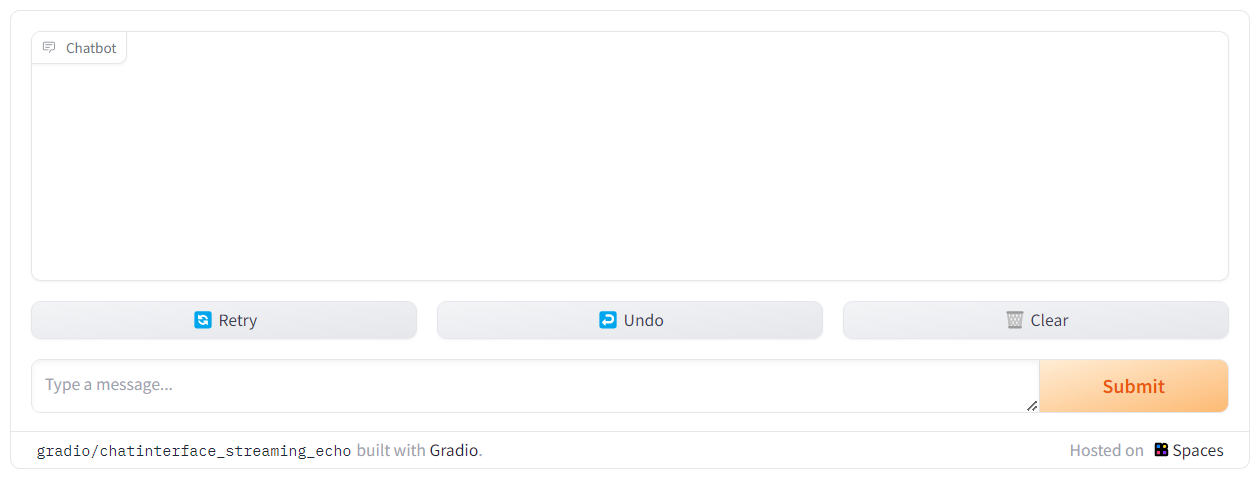


We'll start with a couple of simple examples, and then show how to use gr.ChatInterface() with real language models from several popular APIs and libraries, including langchain, openai, and Hugging Face.

Prerequisites: please make sure you are using the latest version version of Gradio:

**Step 1 : Intall the required libraries **

In [ ]:
! pip install --upgrade gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

**Defining a chat function**

When working with gr.ChatInterface(), the first thing you should do is define your chat function. Your chat function should take two arguments: message and then history (the arguments can be named anything, but must be in this order).

message: a str representing the user's input. history: a list of list representing the conversations up until that point. Each inner list consists of two str representing a pair: [user input, bot response].
Your function should return a single string response, which is the bot's response to the particular user input message. Your function can take into account the history of messages, as well as the current message.

Let's take a look at a few examples.

**Example: a chatbot that responds yes or no**

Let's write a chat function that responds Yes or No randomly.

Here's our chat function:

In [ ]:
#Example: a chatbot that responds yes or no
import random

def random_response(message, history):
    return random.choice(["Yes", "No"])

Now, we can plug this into gr.ChatInterface() and call the .launch() method to create the web interface:

In [ ]:
import gradio as gr

gr.ChatInterface(random_response).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ffcc0ae649d7e21eab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Another example using the user's input and history**

Of course, the previous example was very simplistic, it didn't even take user input or the previous history into account! Here's another simple example showing how to incorporate a user's input as well as the history.

In [ ]:
import random
import gradio as gr

def alternatingly_agree(message, history):
    if len(history) % 2 == 0:
        return f"Yes, I do think that '{message}'"
    else:
        return "I don't think so"

gr.ChatInterface(alternatingly_agree).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5675573d297a95044f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Streaming chatbots**

In your chat function, you can use yield to generate a sequence of partial responses, each replacing the previous ones. This way, you'll end up with a streaming chatbot. It's that simple!

In [ ]:
import time
import gradio as gr

def slow_echo(message, history):
    for i in range(len(message)):
        time.sleep(0.3)
        yield "You typed: " + message[: i+1]

gr.ChatInterface(slow_echo).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b360a87df27a68af88.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Customizing your chatbot**

If you're familiar with Gradio's Interface class, the gr.ChatInterface includes many of the same arguments that you can use to customize the look and feel of your Chatbot. For example, you can:

add a title and description above your chatbot using title and description arguments. add a theme or custom css using theme and css arguments respectively. add examples and even enable cache_examples, which make it easier for users to try it out . You can change the text or disable each of the buttons that appear in the chatbot interface: submit_btn, retry_btn, undo_btn, clear_btn.
If you want to customize the gr.Chatbot or gr.Textbox that compose the ChatInterface, then you can pass in your own chatbot or textbox as well. Here's an example of how we can use these parameters:

In [ ]:
import gradio as gr

def yes_man(message, history):
    if message.endswith("?"):
        return "Yes"
    else:
        return "Ask me anything!"

gr.ChatInterface(
    yes_man,
    #chatbot=gr.Chatbot(height=300),
    textbox=gr.Textbox(placeholder="Ask me a yes or no question", container=False, scale=7),
    chatbot=gr.Chatbot(placeholder="<strong>Your Personal Yes-Man</strong><br>Ask Me Anything"),
    title="Yes Man",
    description="Ask Yes Man any question",
    theme="soft",
    examples=["Hello", "Am I cool?", "Are tomatoes vegetables?"],
    cache_examples=True,
    retry_btn=None,
    undo_btn="Delete Previous",
    clear_btn="Clear",
).launch()

Caching examples at: '/content/gradio_cached_examples/49'
Caching example 1/3
Caching example 2/3
Caching example 3/3
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e918eef240a95a64bb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


When multimodal=True, the signature of fn changes slightly. The first parameter of your function should accept a dictionary consisting of the submitted text and uploaded files that looks like this: {"text": "user input", "file": ["file_path1", "file_path2", ...]}. Similarly, any examples you provide should be in a dictionary of this form. Your function should still return a single str message.

**Additional Inputs**

You may want to add additional parameters to your chatbot and expose them to your users through the Chatbot UI. For example, suppose you want to add a textbox for a system prompt, or a slider that sets the number of tokens in the chatbot's response. The ChatInterface class supports an additional_inputs parameter which can be used to add additional input components.

The additional_inputs parameters accepts a component or a list of components. You can pass the component instances directly, or use their string shortcuts (e.g. "textbox" instead of gr.Textbox()). If you pass in component instances, and they have not already been rendered, then the components will appear underneath the chatbot (and any examples) within a gr.Accordion(). You can set the label of this accordion using the additional_inputs_accordion_name parameter.

Here's a complete example:

In [ ]:
import gradio as gr
import time

def echo(message, history, system_prompt, tokens):
    response = f"System prompt: {system_prompt}\n Message: {message}."
    for i in range(min(len(response), int(tokens))):
        time.sleep(0.05)
        yield response[: i + 1]

demo = gr.ChatInterface(
    echo,
    additional_inputs=[
        gr.Textbox("You are helpful AI.", label="System Prompt"),
        gr.Slider(10, 100),
    ],
)

demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://80fbd333727b3281c3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Example using a local, open-source LLM with Hugging Face**

Of course, in many cases you want to run a chatbot locally. Here's the equivalent example using Together's RedePajama model, from Hugging Face (this requires you to have a GPU with CUDA).

In [ ]:
import gradio as gr
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, StoppingCriteria, StoppingCriteriaList, TextIteratorStreamer
from threading import Thread

tokenizer = AutoTokenizer.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1")
model = AutoModelForCausalLM.from_pretrained("togethercomputer/RedPajama-INCITE-Chat-3B-v1", torch_dtype=torch.float16)
model = model.to('cuda:0')

class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = [29, 0]
        for stop_id in stop_ids:
            if input_ids[0][-1] == stop_id:
                return True
        return False

def predict(message, history):
    history_transformer_format = history + [[message, ""]]
    stop = StopOnTokens()

    messages = "".join(["".join(["\n<human>:"+item[0], "\n<bot>:"+item[1]])
                for item in history_transformer_format])

    model_inputs = tokenizer([messages], return_tensors="pt").to("cuda")
    streamer = TextIteratorStreamer(tokenizer, timeout=10., skip_prompt=True, skip_special_tokens=True)
    generate_kwargs = dict(
        model_inputs,
        streamer=streamer,
        max_new_tokens=1024,
        do_sample=True,
        top_p=0.95,
        top_k=1000,
        temperature=1.0,
        num_beams=1,
        stopping_criteria=StoppingCriteriaList([stop])
        )
    t = Thread(target=model.generate, kwargs=generate_kwargs)
    t.start()

    partial_message = ""
    for new_token in streamer:
        if new_token != '<':
            partial_message += new_token
            yield partial_message

gr.ChatInterface(predict).launch()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/630 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.69G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d341e00cc2d3da5dd8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
